In [43]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Train Autoencoder

In [1]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))

Using TensorFlow backend.


11493376/11490434 [==============================] - 16s 1us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.0757 - val_loss: 0.0501
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0428 - val_loss: 0.0357
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0327 - val_loss: 0.0293
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0283 - val_loss: 0.0263
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0258 - val_loss: 0.0244
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0241 - val_loss: 0.0230
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0228 - val_loss: 0.0219
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0217 - val_loss: 0.0209
Epoch 9/10
60000/60000 [====================

In [6]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
bottleneck (Dense)           (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               402192    
Total params: 938,522
Trainable params: 938,522
Non-trainable params: 0
________________________________________________

In [12]:
autoencoder.get_layer('bottleneck').output

<tf.Tensor 'bottleneck/BiasAdd:0' shape=(None, 10) dtype=float32>

In [14]:
autoencoder.get_layer('bottleneck').weights

[<tf.Variable 'bottleneck/kernel:0' shape=(128, 10) dtype=float32, numpy=
 array([[-0.0398443 , -0.21487848, -0.13887323, ...,  0.19589603,
         -0.20599921, -0.11875284],
        [ 0.17509595, -0.06533078,  0.17686372, ...,  0.06134965,
         -0.20500968,  0.05614705],
        [-0.11906472,  0.13820335,  0.1589758 , ..., -0.16619082,
         -0.06200409,  0.07444701],
        ...,
        [-0.15569523, -0.14085464, -0.23075418, ..., -0.10970678,
         -0.00368037, -0.19874252],
        [ 0.0523545 ,  0.24405935, -0.15326215, ...,  0.23970947,
         -0.14270091, -0.12517223],
        [-0.06570898,  0.08308975,  0.13241537, ..., -0.17165847,
          0.12098081, -0.14692289]], dtype=float32)>,
 <tf.Variable 'bottleneck/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.01279304,  0.01471656, -0.01414187,  0.01504893, -0.01125584,
        -0.00452628, -0.00340241, -0.0074803 ,  0.00281519,  0.00992834],
       dtype=float32)>]

# Predict

In [20]:
train_x.shape, autoencoder.input, autoencoder.get_layer('bottleneck').output

((60000, 784),
 <tf.Tensor 'dense_1_input:0' shape=(None, 784) dtype=float32>,
 <tf.Tensor 'bottleneck/BiasAdd:0' shape=(None, 10) dtype=float32>)

In [16]:
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

In [49]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

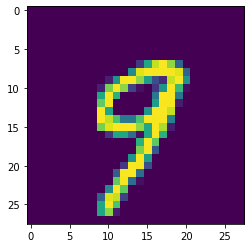

In [54]:
plt.imshow(train_x[w.value].reshape(28, 28))

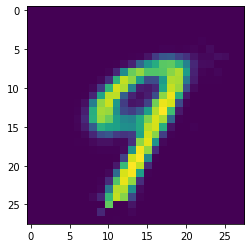

In [55]:
plt.imshow(decoded_output[w.value].reshape(28, 28))

In [ ]:
# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)